## Dian Pramesti
## PYTN-KS11-005
## Assignment Python 2 

# Project Overview
The dataset used in this project is NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [1]:
# Import library
%matplotlib inline
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import random
import warnings

In [2]:
# Membaca dataset
data = pd.read_csv('nyc-rolling-sales.csv')
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# Mengganti kolom borough menjadi area
data.rename(columns={'BOROUGH':'AREA'}, inplace=True )

In [4]:
data

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


AREA berisi kode properti
1. Manhattan
2. Bronx
3. Brooklyn 
4. Queens
5. Staten Island

In [5]:
# Mengganti kode area 1 dengan manhattan, 2 dengan bronx, 3 dengan brooklyn, 4 dengan queens, dan 5 dengan staten islands
data['AREA'] = data.AREA.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
data.head()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
# Menampilkan ringkasan statistik deskriptif pada setiap kolom 
data.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
# Menampilkan 5 data teratas
data.head()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# Menampilkan 5 data terbawah
data.tail()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,Staten Islands,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [9]:
# Mengetahui dimensi dataframe (baris, kolom)
data.shape

(84548, 22)

In [10]:
# Menghapus kolom Unnamed: 0	dan EASE-MENT
data.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
data.head()

,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
# Mengetahui jumlah data yang duplikat 
data.duplicated().sum()

765

In [12]:
# Menghapus data yang duplikat
data.drop_duplicates(inplace=True)
print(sum(data.duplicated()))

0


In [13]:
# Memberikan informasi tentang dataframe (menampilkan jumlh baris dan kolom, jumlah nilai non-null setiap kolom, tipe data setiap kolom, jumlah memori yang digunakan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   AREA                            83783 non-null  object
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   APARTMENT NUMBER                83783 non-null  object
 9   ZIP CODE                        83783 non-null  int64 
 10  RESIDENTIAL UNITS               83783 non-null  int64 
 11  COMMERCIAL UNITS                83783 non-null  int64 
 12  TOTAL UNITS                     83783 non-null

In [14]:
# Tipe data numerik digunakan untuk variabel atau kolom yang memiliki nilai berupa angka atau bilangan
# Mengkonversi tipedata 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE' menjadi numerik
num = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in num:
    data[col]= pd.to_numeric(data[col], errors='coerce') #erros='coerce' artinya nilai yang tidak dapat dikonversi akan diubah menjadi nilai NaN
    
# Tipe data category digunakan untuk variabel atau kolom yang memiliki nilai terbatas atau kategori yang sudah ditentukan
# Mengkonversi tipedata 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'AREA' menjadi kategorik
ctg = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'AREA']
for col in ctg:
    data[col]= data[col]. astype('category')
    
# Tipe data date atau tanggal digunakan untuk variabel atau kolom yang memiliki nilai berupa tanggal atau waktu
# Mengkonversi tipedata 'SALE DATE'
data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')

In [15]:
# Memberikan informasi tentang dataframe (menampilkan jumlh baris dan kolom, jumlah nilai non-null setiap kolom, tipe data setiap kolom, jumlah memori yang digunakan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   AREA                            83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [16]:
# Mengetahui jumlah nilai yang hilang (null atau NaN) pada setiap kolom
data.isnull().sum()

AREA                                  0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [17]:
# Mengisi nilai kosong
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [18]:
# Mengetahui jumlah nilai ynag hilang (null atau NaN) pada setiap kolom
data.isnull().sum()

AREA                              0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Measure of Central Tendency
1. Mean atau rata-rata : Jumlah dari semua data dibagi dengan jumlah data yang ada. 
2. Median : Nilai tengah dari sekelompok data yang sudah diurutkan dari yang terkecil hingga yang terbesar. 
3. Mode : Nilai yang paling sering muncul dalam sekelompok data.

Rumusan Masalah :
1. Berapa luas dan harga rata-rata properti di masing-masing area?
2. Berapa median dari luas dan harga properti di masing-masing area?
3. Bagaimana mayoritas data di setiap area? 

1. Luas dan harga rata-rata properti di masing-masing area

In [19]:
data.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,3909.012725,4489.147412,5.946771e+05
Brooklyn,2016.057333,2481.756365,8.410834e+05
Manhattan,4023.711900,6710.692468,2.919586e+06
Queens,4127.604450,3494.728350,9.049718e+05
Staten Islands,7848.918866,2586.936204,7.488526e+05


Keterangan:

1. Area Bronx memiliki rata rata land square feet sebesar 3909.012725, rata rata gross square feet 4489.147412, dan rata rata sale price 5.946771e+05.
2. Area Brooklyn memiliki rata rata land square feet sebesar 2016.057333, rata rata gross square feet 2481.756365, dan rata rata sale price 8.410834e+05.
3. Area Manhattan memiliki rata rata land square feet sebesar 4023.711900, rata rata gross square feet 6710.692468, dan rata rata sale price 2.919586e+06.
4. Area Queens memiliki rata rata land square feet sebesar	4127.604450	3494, rata rata gross square feet 3494.728350, dan rata rata sale price	9.049718e+05
5. Area Staten Islands memiliki rata rata land square feet sebesar	7848.918866, rata rata gross square feet 2586.936204, dan rata rata sale price 7.488526e+05

2. Nilai tengah dari luas dan harga rata-rata properti di masing-masing area

In [20]:
data.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,2375.000000,1764.000000,2.748970e+05
Brooklyn,1800.000000,1520.000000,4.256050e+05
Manhattan,3854.481179,3894.415813,1.280703e+06
Queens,3854.481179,2423.500000,7.400000e+05
Staten Islands,3854.481179,1800.000000,5.600000e+05


Keterangan:

1. Area Bronx memiliki nilai tengah land square feet sebesar 2375.000000, nilai tengah gross square feet 1764.000000, dan nilai tengah sale price 2.748970e+05.
2. Area Brooklyn memiliki nilai tengah land square feet sebesar 1800.000000, nilai tengah gross square feet 1520.000000, dan nilai tengah sale price 4.256050e+05.
3. Area Manhattan memiliki nilai tengah land square feet sebesar 3854.481179, nilai tengah gross square feet 3894.415813, dan nilai tengah sale price 1.280703e+06.
4. Area Queens memiliki nilai tengah land square feet sebesar	3854.481179, nilai tengah gross square feet 2423.500000, dan nilai tengah sale price	7.400000e+05.
5. Area Staten Islands memiliki nilai tengah land square feet sebesar	3854.481179, nilai tengah square feet 1800.000000, dan nilai tengah sale price 5.600000e+05.



3. Mode tiap kolom berdasarkan area

In [21]:
data.groupby('AREA').apply(pd.DataFrame.mode).reset_index(drop=True)

,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Bronx,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.000000,0.000000,0,1,D4,0.000000e+00,2017-06-29
1,Brooklyn,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.000000,0.000000,0,1,R4,0.000000e+00,2016-10-06
2,Manhattan,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,3854.481179,3894.415813,0,2,R4,1.280703e+06,2017-08-07
3,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,3854.481179,3894.415813,1920,1,A1,1.280703e+06,2016-11-10
4,Staten Islands,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,3854.481179,3894.415813,1970,1,A5,1.280703e+06,2017-03-01


Keterangan:

Data diatas menjelaskan bagaimana keadaan mayoritas (nilai yang sering muncul) di setiap area Bronx, Brooklyn, Manhattan, Queens, Staten Islands. Mulai dari Neighborhood, Building Class Category,  Tax Class At Present, Block,  Lot,  Building Class At Present,  Address,  Apartment Number, Zip Code, Residential Units,  Commercial Units, Total Units ,Land Square Feet, Gross Square Feet, Year Built, Tax Class At Time Of Sale,  Building Clas At Time Of Sale, Sale Price, Sale Date.



# Measure of Spread
1. Range : Selisih antara nilai terbesar dan terkecil dalam suatu data.
2. Variance : Ukuran penyebaran yang mengukur seberapa jauh data tersebar dari nilai rata-rata. Varians merupakan rata-rata dari kuadrat selisih antara setiap data dengan nilai rata-rata.
3. Standard Deviation : Akar kuadrat dari varians. 

Rumusan Masalah:

1. Berapa range dari luas wilayah dan harga setiap area?
2. Berapa nilai variance dari luas dan harga setiap area?
3. Berapa nilai standard deviation dari luas dan harga setiap area?

1. Range luas wilayah dan harga pada semua area

In [22]:
# .agg() = aggregate 
range = data.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].agg(np.ptp)
range

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,679000.0,1303935.0,1.100000e+08
Brooklyn,970000.0,1330743.0,3.450000e+08
Manhattan,363912.0,2155267.0,2.210000e+09
Queens,4228293.0,3750365.0,2.575000e+08
Staten Islands,4252225.0,683000.0,1.220000e+08


Keterangan:

Data diatas menjelaskan range dari Land Square Feet, Gross Square Feet,	Sale Price dari masing masing area.

2. Variance 

In [23]:
data.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,3.375209e+08,8.683572e+08,7.803693e+12
Brooklyn,7.882877e+07,2.210455e+08,1.561761e+13
Manhattan,2.688551e+07,1.372866e+09,4.634363e+14
Queens,1.397188e+09,1.158215e+09,7.285544e+12
Staten Islands,6.945889e+09,1.559204e+08,2.729078e+12


Keterangan:

Data diatas menjelaskan variance dari Land Square Feet, Gross Square Feet,	Sale Price dari masing masing area.

3. Standard Deviance

In [24]:
data.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,18371.742462,29467.900592,2.793509e+06
Brooklyn,8878.556905,14867.597573,3.951912e+06
Manhattan,5185.123686,37052.201025,2.152757e+07
Queens,37378.974526,34032.558436,2.699175e+06
Staten Islands,83341.999698,12486.809972,1.651992e+06


Keterangan:

Data diatas menjelaskan standard deviance dari Land Square Feet, Gross Square Feet,	Sale Price dari masing masing area.

# Probability Distribution

Rumusan Masalah:

Bagaimana distribusi peluang dari land square feet?

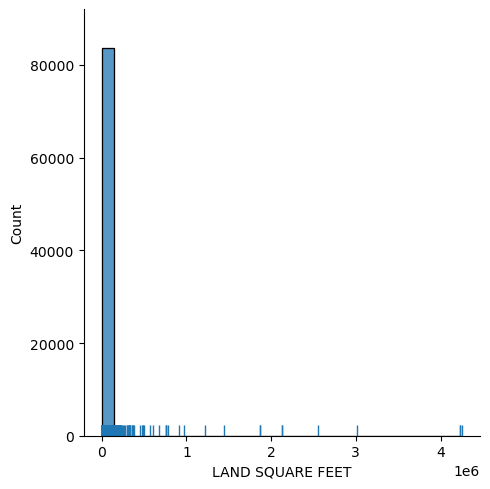

In [25]:
# bins : jumlah kotak yang digunakan untuk mengelompokkan data ke dalam histogram
# rug = True : menampilkan strip plot untuk menunjukkan frekuensi data yang ada pada sumbu x
sns.displot(data['LAND SQUARE FEET'], bins=30, rug=True)

karena data land square feet memiliki nilai kecil, maka datanya di hapus terlebih dahulu.

In [26]:
data_lsf = data[(data['LAND SQUARE FEET'] > 10000) & (data['LAND SQUARE FEET'] < 10000000)]

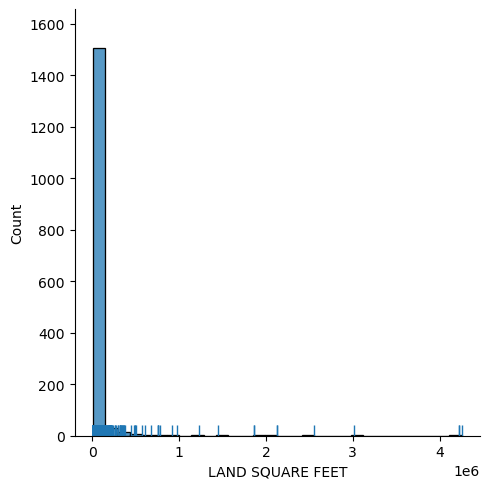

In [27]:
sns.displot(data_lsf['LAND SQUARE FEET'], bins=30, rug=True)

dikarenakan belum adanya perubahan pada plot maka dilakukan normalisasi data dengan transformasi log. Cara melakukan transformasi log adalah dengan mengambil logaritma dari semua nilai data. Jika data memiliki nilai yang sangat kecil, maka dapat ditambahkan nilai kecil seperti 1 sebelum melakukan transformasi log untuk menghindari pembagian dengan nol.

In [28]:
data_lsf['LOG_LSF'] = np.log(data_lsf['LAND SQUARE FEET'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3720\2245630496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lsf['LOG_LSF'] = np.log(data_lsf['LAND SQUARE FEET'])


<Figure size 1000x2000 with 0 Axes>

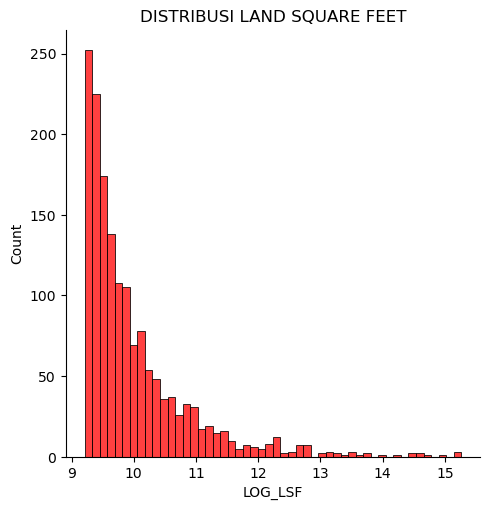

In [29]:
plt.figure(figsize=(10,20))
sns.displot(data_lsf['LOG_LSF'], bins=50, color='red')
plt.title('DISTRIBUSI LAND SQUARE FEET')
plt.show()

Skewed atau skewness merujuk pada ketidaksimetrisan sebuah distribusi data. Sebuah distribusi data dikatakan positively skewed (skewed positif) apabila ekor distribusi berada di sisi kanan dan sebagian besar titik data terkonsentrasi pada sisi kiri, sedangkan negatively skewed (skewed negatif) jika sebaliknya. Distribusi diatas memiliki skewed positif karena ekor distribusi berada di sisi kanan dan sebagaian besar titik data terkonsentrasi pada sisi kiri.

In [30]:
# Kolmogrov-Smirnov Test ( tes statistik yang digunakan untuk menguji apakah sebuah sampel data berasal dari suatu distribusi tertentu)
from scipy import stats

lsf = data['LAND SQUARE FEET']

ks_statistic, p_value = stats.kstest(lsf, 'norm') #kstest() merupakan mpdul SciPy untuk melakukan uji Kolmogrov-Smirnov. lsf merupakan kolom yang akan diuji yaitu land square feet

print("KS-statistic:", ks_statistic)
print("p-value:", p_value)

KS-statistic: 0.8770872372664236
p-value: 0.0


KS-statistic adalah ukuran jarak antara distribusi kolom "col1" dan distribusi normal. Semakin besar nilai KS-statistic, semakin jauh jarak antara kedua distribusi. P-value menunjukkan probabilitas bahwa distribusi kolom "col1" berdistribusi normal. Jika nilai p-value lebih besar dari tingkat signifikansi (biasanya 0,05), maka distribusi kolom "col1" dianggap berdistribusi normal.

Pada data diatas nilai KS-static adalah 0.877 dan nilai p-value adalah 0.0. Dikarenakan p-value kurang dari 0.05 maka distribusi land square feet tidak normal.

# Confidence Intervals

Rumusan Masalah:

1. Berapakah interval kepercayaan dari rata-rata harga jual area Brooklyn?
2. Berapakah interval kepercayaan dari rata-rata harga jual semua area NYC?

1. Interval kepercayaan rata rata harga jual area Brooklyn

In [31]:
data.groupby('AREA').agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
AREA                                             
Bronx           5.946771e+05  2.793509e+06   6994
Brooklyn        8.410834e+05  3.951912e+06  23843
Manhattan       2.919586e+06  2.152757e+07  18102
Queens          9.049718e+05  2.699175e+06  26548
Staten Islands  7.488526e+05  1.651992e+06   8296

In [32]:
mean_brooklyn = 8.410834  # rata-rata harga properti di Brooklyn
sd_brooklyn = 3.951912 # standar deviasi harga properti di Brooklyn
n = 23843 # jumlah properti di Brooklyn
z = 1.96 # z-score berdasarkan tabel z
se = sd_brooklyn / np.sqrt(n) # menghitung standart eror

# menghitung CI
lower = mean_brooklyn - z*se
upper = mean_brooklyn + z*se
print("The lower class boundary is", lower)
print("The upper class boundary is", upper)

The lower class boundary is 8.36067107095988
The upper class boundary is 8.46099692904012


berdasar hasil diatas, rata rata harga penjualan (sale price) di wilayah Brooklyn berada di antara 8.36067107095988 sampai 8.46099692904012 dengan peluang atau selang kepercayaan 95%

2. Interval kepercayaan rata rata harga jual area NYC

In [33]:
x = data['SALE PRICE']
m = x.mean()
s = x.std()
n = len(x)
z = 1.96
se = s/np.sqrt(n)

lower = m - z*se
upper = m + z*se
print("The lower class boundary is", lower)
print("The upper class boundary is", upper)

The lower class boundary is 1210154.763318646
The upper class boundary is 1351251.2372857218


berdasar hasil diatas, rata rata harga penjualan (sale price) di wilayah NYC berada di antara 1210154 sampai 1351251 dengan peluang atau selang kepercayaan 95%

# Hypothesis Testing

Rumusan Masalah :

Dengan mempertimbangkan data NYC Property, apakah Staten Islands memiliki harga jual rata-rata yang lebih tinggi secara signifikan daripada Brooklyn ?


H0: rata-rata harga jual properti di Staten Islands sama dengan rata-rata harga jual di Brooklyn

H1: rata-rata harga jual properti di Staten Islands tidak sama dengan rata-rata harga jual di Brooklyn


In [34]:
SI = data[data["AREA"] == 'Staten Islands']
BR = data[data["AREA"] == 'Brooklyn']
n_si= len(SI)
mu_si = SI["SALE PRICE"].mean()
sd_si = SI["SALE PRICE"].std()
(n_si, mu_si, sd_si)

(8296, 748852.5702382802, 1651992.1972784959)

In [35]:
n_br = len(BR)
mu_br = BR["SALE PRICE"].mean()
sd_br = BR["SALE PRICE"].std()
(n_br, mu_br, sd_br)

(23843, 841083.3950845111, 3951911.835186454)

In [36]:
sm.stats.ztest(SI["SALE PRICE"].dropna(),
               BR["SALE PRICE"].dropna(),
              alternative='two-sided')

(-2.0638725230058794, 0.03902980456870157)

Karena p-value 0.03 < 0.05 maka H0 ditolak dan H1 diterima atau rata-rata harga jual properti di Staten Islands tidak sama dengan rata-rata harga jual di Brooklyn

# Kesimpulan

Dari data nyc-rolling-sales yang memiliki 84548 baris dan 22 kolom dapat disimpulkan bahwa:
-	Rata-rata sale price tertinggi berada di area Queens (9.049718e+05) dengan range harga mencapai 2.575000e+08. Sementara sale price terendah berada di area Manhattan(2.919586e+06) dengan range harga mencapai 2.210000e+09.
-	Rata rata harga penjualan (sale price) di wilayah NYC berada di antara 1210154 sampai 1351251 dengan peluang atau selang kepercayaan 95%
-	Land square terbesar berada di area Staten Islands dan luas area properti terkecil berada di area Brooklyn.
-	Building class category yang sering muncul pada area Bronx dan Brooklyn adalah 02 Two Family Dwellings, area Manhattan adalah 13 Condos-Elevator Apartemens, dan area Queens serta Staten Islands adalah 01 One Family Dwellings.
-	Variance Gross Square Feet Quuens memiliki nilai terkecil di banding lainnya yaitu sebesar 1.158215e+09 dengan standard deviance 34032.558436.
-	Distribusi dari land square feet memiliki skewed positif dan distribusi tidak normal.
-	Dengan hypothesis testing untuk mengetahui apakah Staten Island memiliki rata rata lebih tinggi disbanding Brooklyn menghasilkan p-value 0.03 < 0.05 maka H0 ditolak dan H1 diterima atau rata-rata harga jual properti di Staten Islands tidak sama dengan rata-rata harga jual di Brooklyn.
